In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# conv_layer= tf.keras.layers.Conv2D(
#     filters=32, kernel_size=(3, 3), strides=(1,1), padding="valid", activation= "relu", kernel_initializer="glorot_uniform")

# max_pooling_layer=tf.keras.layers.MaxPool2D(
#     pool_size= (2, 2), strides= None, padding="valid", data_format=None )

# avg_pooling_layer=tf.keras.layers.AveragePooling2D(
#     pool_size= (2, 2), strides= None, padding="valid", data_format=None )

# fully_connected_layer= tf.keras.layers.Dense(
#     units=128, activation= "relu", kernel_initializer="glorot_uniform")


# model= models.Sequential([])

(train_images, train_labels), (test_images, test_labels)=cifar10.load_data()
train_images, test_images = train_images/ 255.0, test_images/ 255.0
train_labels= to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)
model= models.Sequential([
    layers.Conv2D(32, (3, 3), activation= "relu", input_shape= (32, 32, 3)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax")
])
# adam an optimizer that uses math like a gradient vector to optimize the vector
#it prioritizes metrics (accuracy in this case)
model.compile(optimizer="adam",
              loss= "categorical_crossentropy",
              metrics= ["accuracy"])
#epochs are like practice tests, dont put too many or else it will memorize the answers asnd not learn anything and FAIL
#too few is also problem and not practicing enough
#validation data is what you are testing
#train label=practice problem, ttestdata= practice test
history= model.fit (train_images, train_labels, epochs= 10, batch_size =64, validation_data=(test_images, test_labels))

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 35ms/step - accuracy: 0.3720 - loss: 1.7410 - val_accuracy: 0.5455 - val_loss: 1.2803
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 25s 32ms/step - accuracy: 0.5700 - loss: 1.2294 - val_accuracy: 0.5744 - val_loss: 1.2036
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 23s 30ms/step - accuracy: 0.6143 - loss: 1.0943 - val_accuracy: 0.6082 - val_loss: 1.1151
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 24s 31ms/step - accuracy: 0.6509 - loss: 1.0049 - val_accuracy: 0.6332 - val_loss: 1.0560
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 30ms/step - accuracy: 0.6724 - loss: 0.9364 - val_accuracy: 0.6240 - val_loss: 1.0793
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 30ms/step - accuracy: 0.6923 - loss: 0.8852 - val_accuracy: 0.6510 - val_loss: 1.0194
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 30ms/step - accuracy: 0.7122 - loss: 0.8320 - val_accuracy: 0.6493 - val_loss: 1.0202
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 31ms/step - accuracy: 0.7248 - loss: 0.7799 - 

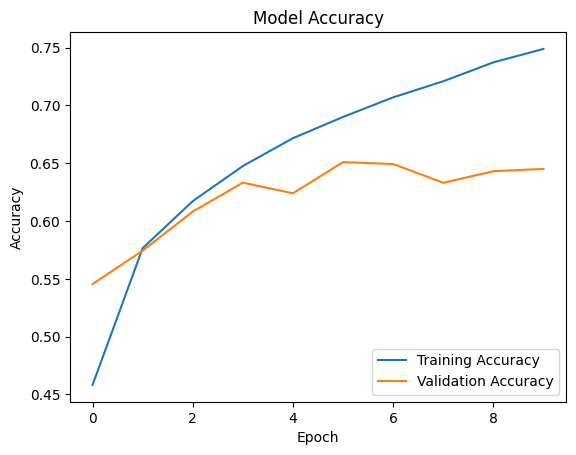

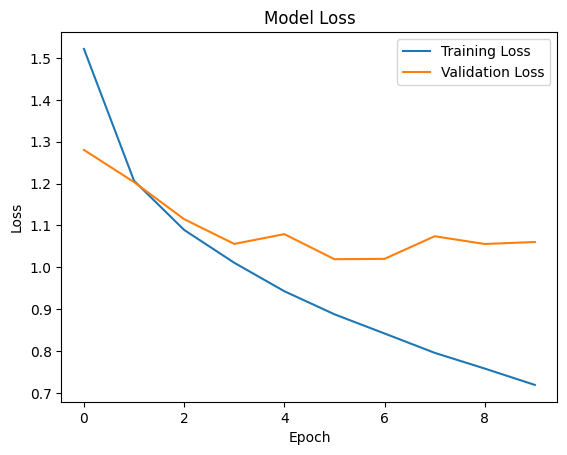

In [2]:
#how to make a graph
plt.plot(history.history['accuracy'], label="Training Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")
plt.show()


plt.plot(history.history['loss'], label="Training Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(loc="upper right")
plt.show()

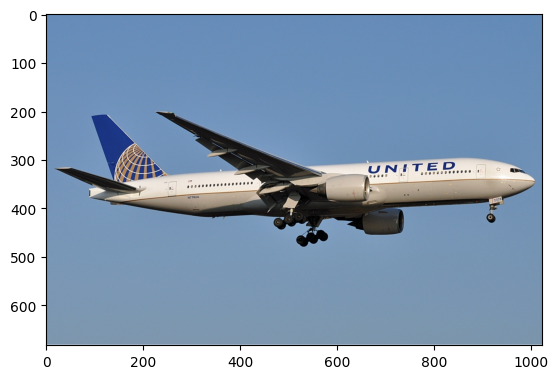

In [3]:
import matplotlib.image as mpimg
img="/content/United_Airlines_Boeing_777-200_Meulemans.jpg"
show_image=mpimg.imread(img)
plt.imshow(show_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
ship


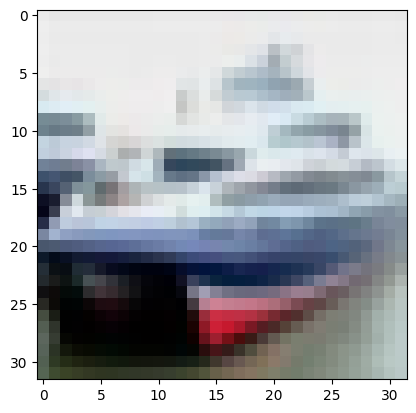

In [23]:
import numpy as np
labels= ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
# label mapping

# select the image from our test dataset
image_number = 1

# display the image
plt.imshow(test_images[image_number])

# load the image in an array
n = np.array(test_images[image_number])

# reshape it
p = n.reshape(1, 32, 32, 3)

# pass in the network for prediction and
# save the predicted label
predicted_label = labels[model.predict(p).argmax()]

# load the original label
# original_label = labels[test_labels[image_number]]

# display the result
# print("Original label is {} and predicted label is {}".format(
#     original_label, predicted_label))
print(predicted_label)